# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

res: CNN 相比FNN 的优势在于：
1. 大大减少了神经网络内部参数的数量，便于分享传播和训练； 
2. 它能从海量数据里提取特征

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

res: Weight的参数数量为：5 * 5 * 50
     bias 的参数数量为：50
     一共有 26 * 50 = 1300

#### 3. What are "local invariant" and "parameter sharing" ?

res: local invariant 是指 Local Invariant Features ？ 原图像特征的镜像、旋转、缩放后结果CNN处理后得到相同的结果的特性。
parameter sharing 是指 参数共享。CNN中每个卷积核每次卷积计算使用同一套参数，这就是CNN中的参数共享。

#### 4. Why we use batch normalization ?

res: 因为当神经网络层数较多时，随着网络深度加深或者在训练过程中，其分布逐渐发生偏移或者变动，之所以训练收敛慢，一般是整体
分布逐渐往非线性函数的取值区间的上下限两端靠近。
误差梯度反向传递会逐层减少，甚至消失，导致神经网络难以有效地训练。
而 batch normalization（BN）就是通过一定的规范化手段，把每层神经网络任意神经元的输入值的分布强行拉回到均值为0方差为1的标准正态分布，
这样使得激活输入值落在非线性函数对输入比较敏感的区域，这样输入的小变化就会导致损失函数较大的变化。这样让梯度变大，避免梯度消失问题产生，
而且梯度变大意味着学习收敛速度快，能大大加快训练速度。

#### 5. What problem does dropout try to solve ?

res: 解决Overfitting问题。

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

res: 不对。pooling 层虽然没有参数，但它也是有计算过程的。反向传播，也需要考虑pooling层的导数传递过程。
不同的pooling层，导数计算不一样。所以它对反向传播还是有影响的。
pooling 层没有参数，意味着不需要训练它。

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

Load the dataset. 

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

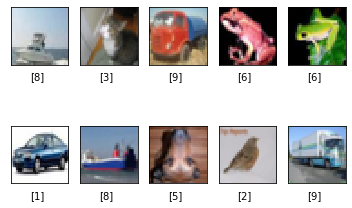

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1+100])
    plt.text(10,40,str(y_train[i-1+100]))
    plt.xticks([])
    plt.yticks([])
plt.show()

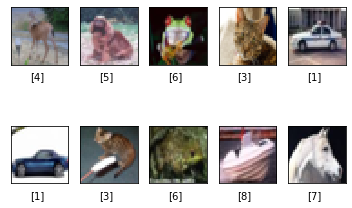

In [4]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_test[i-1+100])
    plt.text(10,40,str(y_test[i-1+100]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
print(y_train[100])
print(y_train[100].shape)
print(y_train[100].dtype)

[8]
(1,)
uint8


In [3]:
y_test = y_test.astype(numpy.integer)
y_train = y_train.astype(numpy.integer)
print(y_train[100].dtype)

int32


In [ ]:
print(x_train[100])
print(x_train[100].shape)

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [35]:
net = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, [3,3], padding = 'same',  activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding = 'same'),
    tf.keras.layers.Conv2D(128, [3,3], padding = 'same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.BatchNormalization(axis=1),
    tf.keras.layers.Dense(10, activation='softmax'),
])

net.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:
net.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.00025), 
            loss= tf.keras.losses.sparse_categorical_crossentropy)
net.fit(x_train,y_train,batch_size=128,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 146s 3ms/sample - loss: 0.0823

In [15]:
net.save( "MyNet64_128", overwrite=True, include_optimizer=False )

In [7]:
# 重新加载模型
net = tf.keras.models.load_model("MyNet64_128")
net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [4]:
net = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, [5,5], padding = 'same',  activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding = 'same'),
    tf.keras.layers.Conv2D(128, [3,3], padding = 'same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax'),
])

net.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________

In [10]:
net.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.00025), 
            loss= tf.keras.losses.sparse_categorical_crossentropy
            , metrics = ["accuracy"])
net.fit(x_train,y_train,batch_size=64,epochs=10, validation_split = 0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 173s 4ms/sample - loss: 0.7535 - acc: 0.7382 - val_loss: 1.1067 - val_acc: 0.6454

In [9]:
net.save( "MyNet64_128_128_dropout", overwrite=True, include_optimizer=False )

In [ ]:
# 重新加载模型
net = tf.keras.models.load_model("MyNet64_128_128_dropout")
net.summary()

In [4]:
from collections import Counter

def see_result(y, y_predict):
    Y_Result = []
    for i in range(y_predict.shape[0]):
        Y_Result.append( numpy.argmax(y_predict[i]) )
    Y_Result = numpy.array(Y_Result)
    counter = Counter(list((Y_Result == y.reshape(-1))))
    print(counter)
    print("accuracy:",  counter[True]/len(y))
    yTypeCountor = Counter(y.reshape(-1))
    print("y 类型对应的数量：", yTypeCountor)
    print()
    

In [ ]:
see_result(y_test, net.predict(x_test))
see_result(y_train, net.predict(x_train))

###  经过几天的调参和网络设计并没有让CNN+FNN 的神经网络在测试集上的准确率70%左右徘徊，感觉好失败！于是去网上找找看，到底什么网络能
解决这样的问题。
http://www.360doc.com/content/19/0903/05/46368139_858784051.shtml
https://blog.csdn.net/gzroy/article/details/82386540
上面两篇文章都提到了ResNet，并且准确率都高达90+%
下面尝试一下：
接 Assignment_6 part2.ipynb